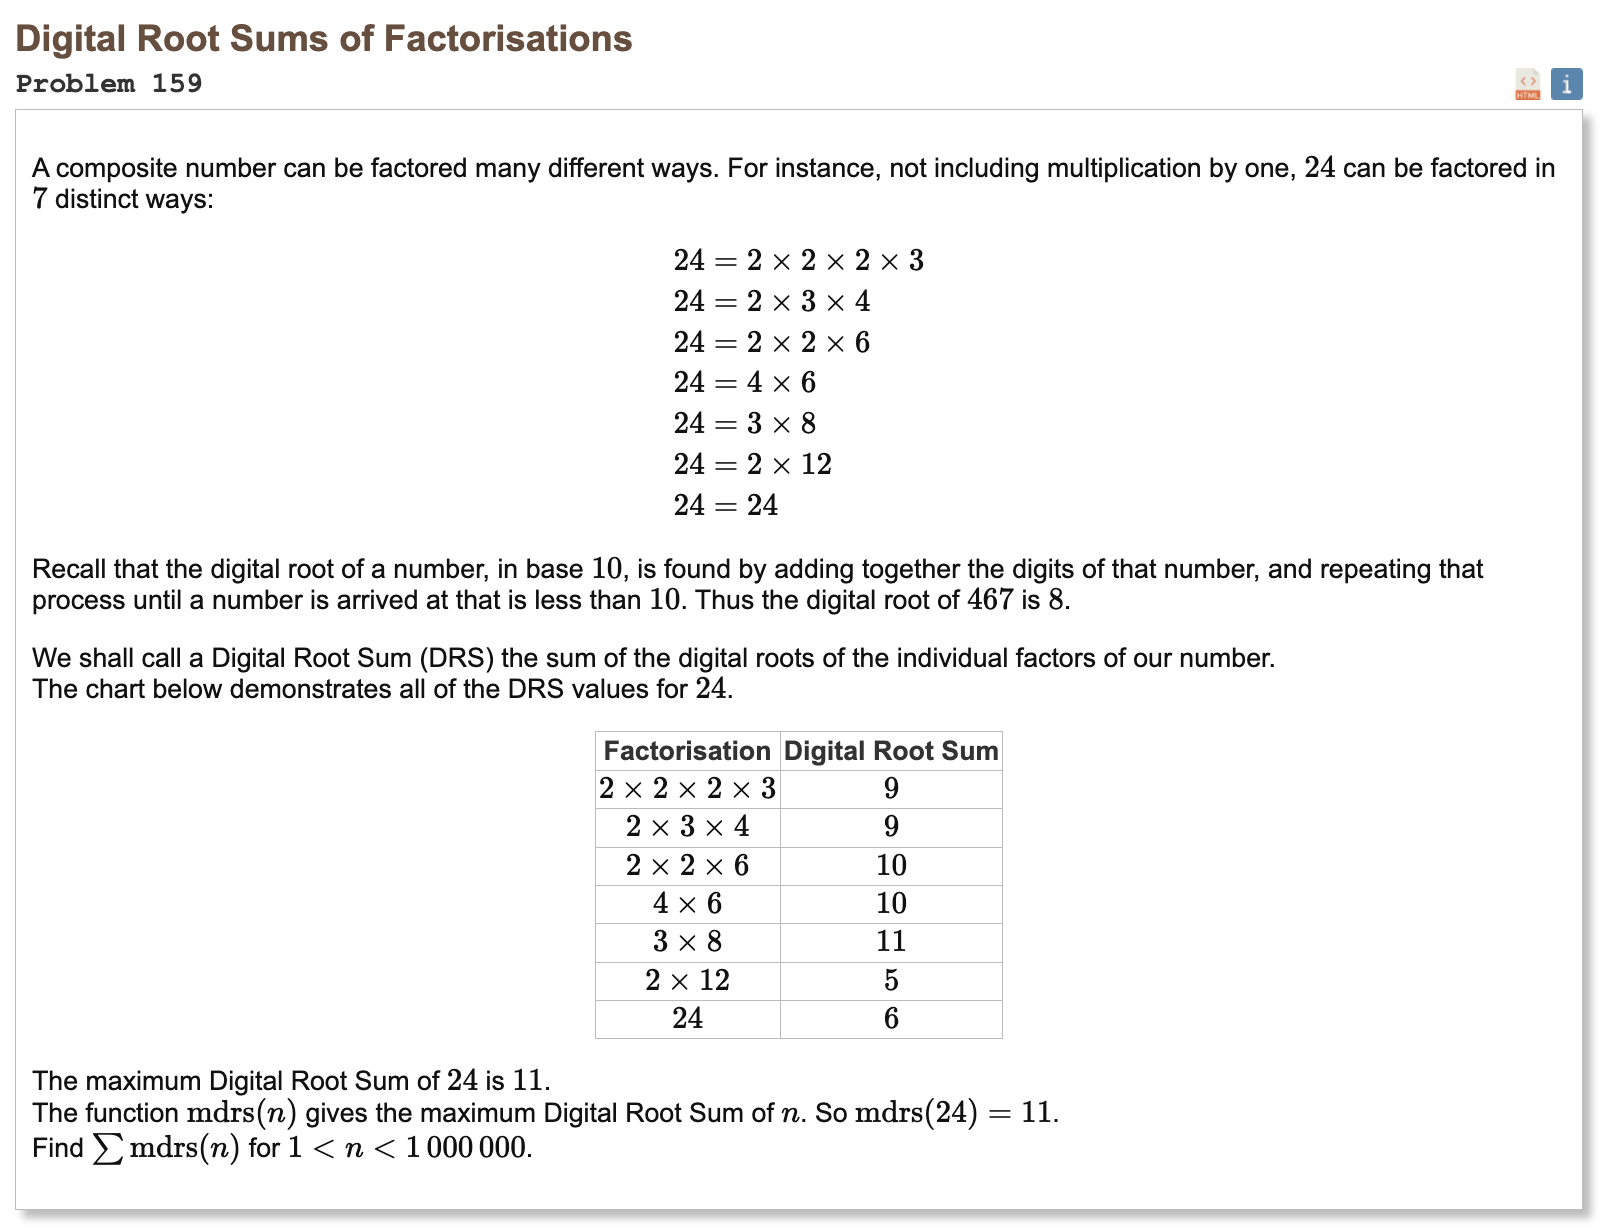

## Initial approach

* make a sieve like dp that tries every proper factorisation for each n
* initialize mdrs[n] with its own digital root since not factoring is always allowed
* use digital root formula dr(n) = 1 + ((n − 1) mod 9) for fast constant time
for each d from 2 to limit
* update all multiples m = k·d with max(mdrs[m], mdrs[d] + mdrs[m//d])
* this sweeps all factor pairs once per multiple and naturally captures the best split
* primes keep mdrs[p] = dr(p) because no proper factorisation exists
* sum mdrs[n] over 2 ≤ n < 10^6 to get the final answer
* no external libraries needed besides built ins

In [1]:
def dr(n):
    return 1 + (n - 1) % 9

def solve(limit):
    mdrs = [0] * limit
    for n in range(2, limit):
        mdrs[n] = dr(n)
    for d in range(2, limit // 2 + 1):
        for m in range(d * 2, limit, d):
            v = mdrs[d] + mdrs[m // d]
            if v > mdrs[m]:
                mdrs[m] = v
    return sum(mdrs[2:])

In [2]:
%%time

result = solve(1_000_000)
print("Result:", result)

Result: 14489159
CPU times: user 596 ms, sys: 8.17 ms, total: 604 ms
Wall time: 604 ms
